In [1]:
setwd('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1009. NC ENVRIOSCAN/P1009.3. Analyses/P1009.3.5. Cluster Variable Averages')
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1009. NC ENVRIOSCAN/P1009.3. Analyses/P1009.3.5. Cluster Variable Averages/Output')
cur_date = "072523"

library(readxl)
library(openxlsx)
library(tidyverse)
library(reshape2)
library(tidytext)
library(rcartocolor)
library(MetBrewer)
library(RColorBrewer)
library(cowplot)
library(scales)
library(ggtext)
library(car) 
library(multcomp) 

# reading in files
ejscreen_cluster_df = data.frame(read_excel("Input/GEO_ID_Sociodemographic_Clusters_030123.xlsx"))
housing_df = data.frame(read_excel("Input/Imputed_Housing_Data_030923.xlsx"))
whp_df = data.frame(read_excel("Input/Imputed_Wildfire_Hazard_030923.xlsx"))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘pack

In [2]:
head(ejscreen_cluster_df)
head(housing_df)

,GEO_ID,Census_Tract,County,Variables,Value,Scaled_Value,Cluster
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,14000US37001020100,201,Alamance,Population_Under_5,9.5,1.45508797,3
2,14000US37001020100,201,Alamance,Population_Over_65,15.1,-0.20849618,3
3,14000US37001020100,201,Alamance,Race_Non_White,39.0,0.33121718,3
4,14000US37001020100,201,Alamance,Hispanic_Latino,9.5,0.04837140,3
5,14000US37001020100,201,Alamance,Non_Proficient_English_Speakers,3.9,-0.09907552,3
6,14000US37001020100,201,Alamance,Poverty_Overall,27.2,1.07521173,3


,GEO_ID,Census_Tract,County,Total_Housing_Units,Housing_Density,Total_Occupied_Housing_Units,Total_Owner_Occupied_Housing_Units,Median_Year_Structure_Built,Owner_Occupied_Housing_Units_Less_than_HPI,Median_House_Value,Median_Gross_Rent,Median_Gross_Rent_Percentage_of_Household_Income
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14000US37001020100,201.00,Alamance,2006,31.54848,1757,851,1949,824,149600,614,27.9
2,14000US37001020200,202.00,Alamance,1943,26.03618,1675,881,1961,881,83400,609,31.5
3,14000US37001020300,203.00,Alamance,3254,71.60011,2930,2015,1971,1980,91500,763,37.7
4,14000US37001020400,204.00,Alamance,2590,53.47674,2327,1510,1974,1487,96900,659,34.3
5,14000US37001020501,205.01,Alamance,1435,122.03583,1280,990,1973,932,137400,584,46.7
6,14000US37001020502,205.02,Alamance,1484,471.34609,1275,666,1980,666,73500,672,35.9


Plotting the average scaled value for each variable within each cluster to visualize the magnitude and directionality of each variable. Later on plotting, the average WHP for each cluster.

In [3]:
# combining each into 1 df
# ejscreen
averaged_ejscreen_df = ejscreen_cluster_df %>%
    # averaging values for each variable within each cluster
    group_by(Cluster, Variables) %>%
    summarize(Avg_Scaled_Value = mean(Scaled_Value), Avg_Value = mean(Value)) %>%
    # lastly arranging variables from highest to lowest within each cluster
    arrange(-Avg_Scaled_Value, .by_group = TRUE) %>%
    ungroup() %>%
    # cleaning variable names here
    mutate(Variables = ifelse(Variables == "Non_Proficient_English_Speakers", "Non-proficient English Speakers",
                                  ifelse(Variables == "Less_than_High_School", "Less than High School Education",
                                      ifelse(Variables == "Population_Over_65", "Over 65 Years Old",
                                         ifelse(Variables == "Population_Under_5", "Under 5 Years Old",
                                             ifelse(Variables == "Hispanic_Latino", "Hispanic and/or Latino",
                                                ifelse(Variables == "Poverty_Overall", "Below Federal Poverty Level",
                                                    ifelse(Variables == "Race_Non_White", "Non-White Population",
                                                           ifelse(Variables == "Unemployed", Variables,
                             NA)))))))))

averaged_ejscreen_df$Cluster = as.character(averaged_ejscreen_df$Cluster)

head(averaged_ejscreen_df)

`summarise()` has grouped output by 'Cluster'. You can override using the
`.groups` argument.


Cluster,Variables,Avg_Scaled_Value,Avg_Value
<chr>,<chr>,<dbl>,<dbl>
1,Over 65 Years Old,0.3058091,18.997422
1,Under 5 Years Old,-0.2717533,5.043984
1,Non-proficient English Speakers,-0.3493582,2.610937
1,Unemployed,-0.3635031,4.332424
1,Hispanic and/or Latino,-0.3789516,5.873047
1,Less than High School Education,-0.3838343,19.530495


# EJScreen Cluster Variables

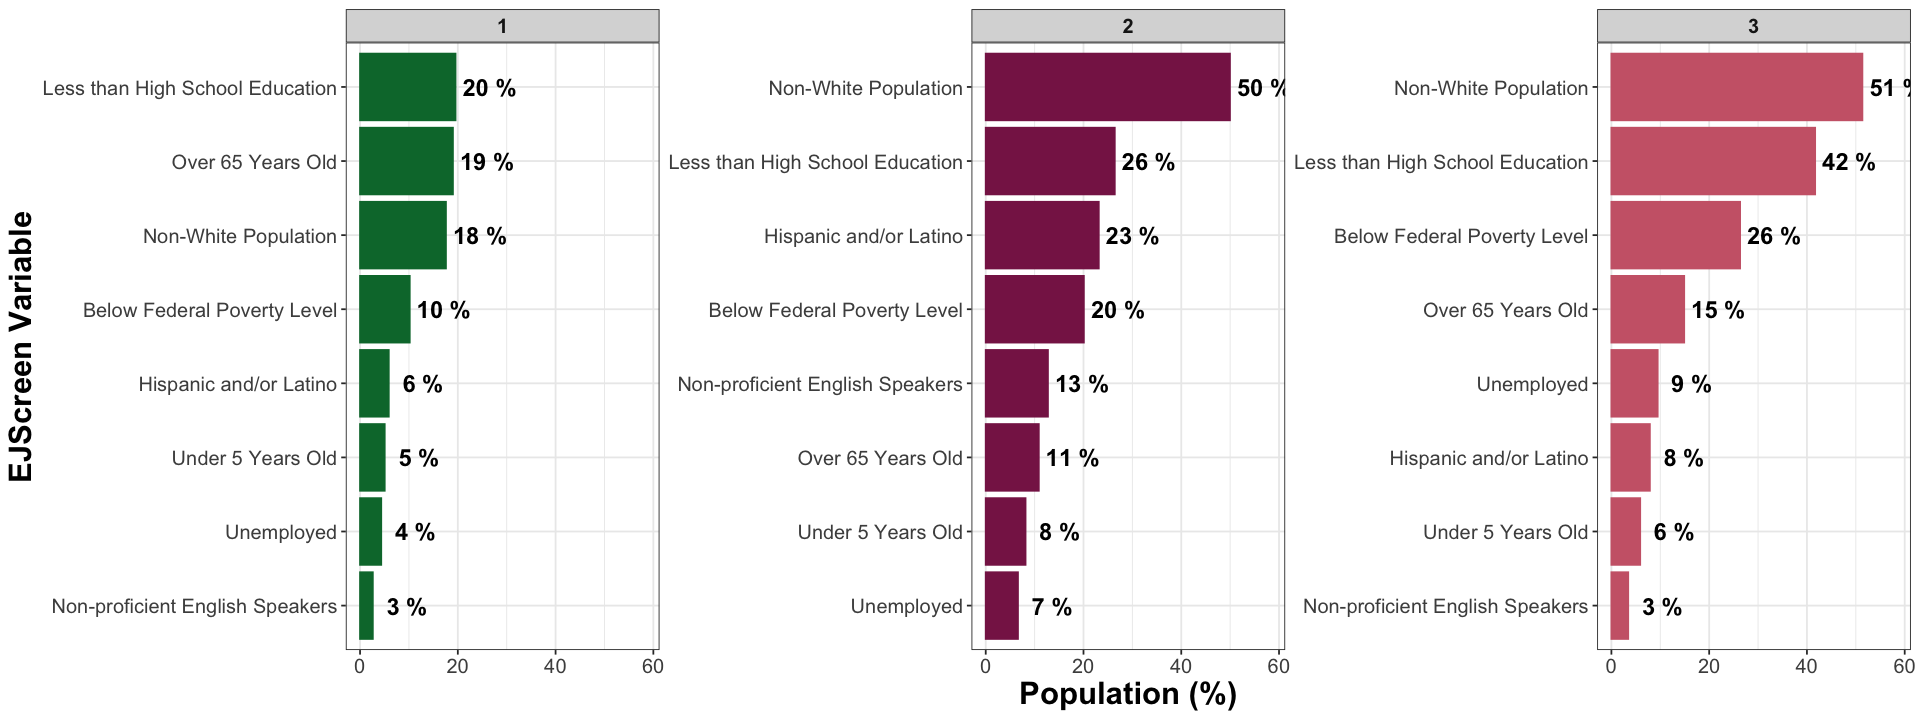

In [4]:
options(repr.plot.width = 16, repr.plot.height = 6) #changing size

# getting color palette
prism_colors = carto_pal(12, "Safe")

FigureS1a = ggplot() + 
  geom_col(data = averaged_ejscreen_df, aes(x = Avg_Value, 
                                            y = reorder_within(Variables, Avg_Value, Cluster), 
                                            color = Cluster, fill = Cluster)) + 
  # adding in original values for clarity
  geom_text(data = averaged_ejscreen_df, aes(x = Avg_Value + 7, label = paste(round(Avg_Value),"%"), 
                y = reorder_within(Variables, Avg_Value, Cluster)), fontface = "bold", size = 5) +
 
  scale_y_reordered() + # for some reason this cleans up the variables names

  facet_wrap(~Cluster, scales = 'free_y') + 
  theme_bw() + #changing theme
  theme(axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        strip.text = element_text(size = 12, face = "bold"), #changing facet wrap text
        legend.position = "none") + #removing legend

  scale_color_manual(values = c("#027639", prism_colors[c(9,2)])) +
  scale_fill_manual(values = c("#027639", prism_colors[c(9,2)])) +

  labs(y = 'EJScreen Variable', x = "Population (%)")

FigureS1a

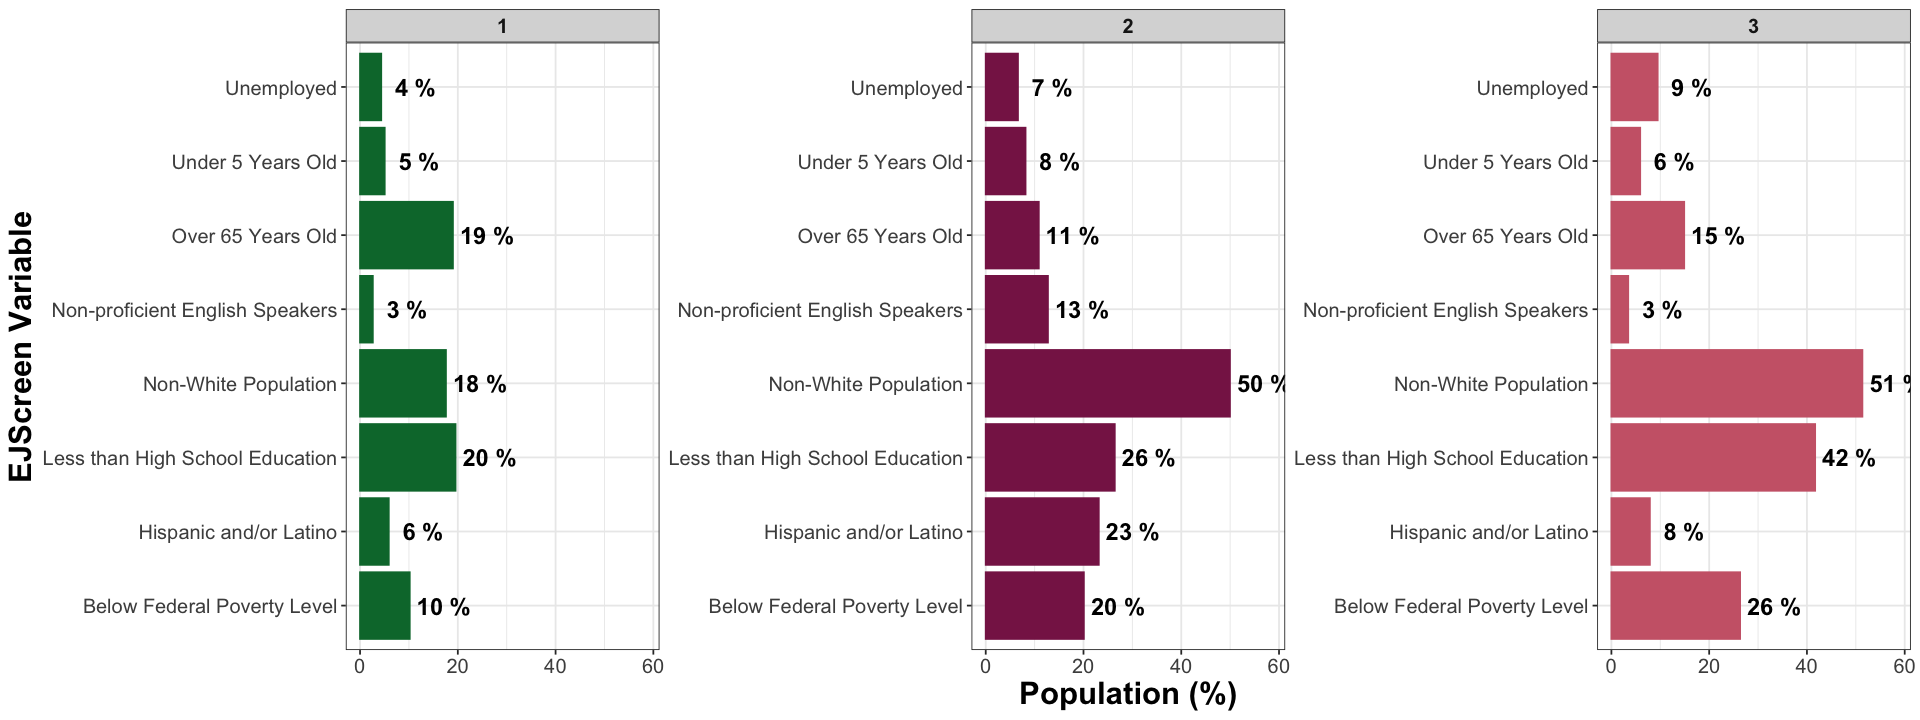

In [5]:
FigureS1b = ggplot() + 
  geom_col(data = averaged_ejscreen_df, aes(x = Avg_Value, y = Variables, 
                                            color = Cluster, fill = Cluster)) + 

 # adding in original values for clarity
  geom_text(data = averaged_ejscreen_df, aes(x = Avg_Value + 7, label = paste(round(Avg_Value),"%"), 
                y = Variables), fontface = "bold", size = 5) +

  facet_wrap(~Cluster, scales = 'free_y') + 
  theme_bw() + #changing theme
  theme(axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        strip.text = element_text(size = 12, face = "bold"), #changing facet wrap text
        legend.position = "none") + #removing legend

  scale_color_manual(values = c("#027639", prism_colors[c(9,2)])) +
  scale_fill_manual(values = c("#027639", prism_colors[c(9,2)])) +

  labs(y = 'EJScreen Variable', x = "Population (%)")

FigureS1b

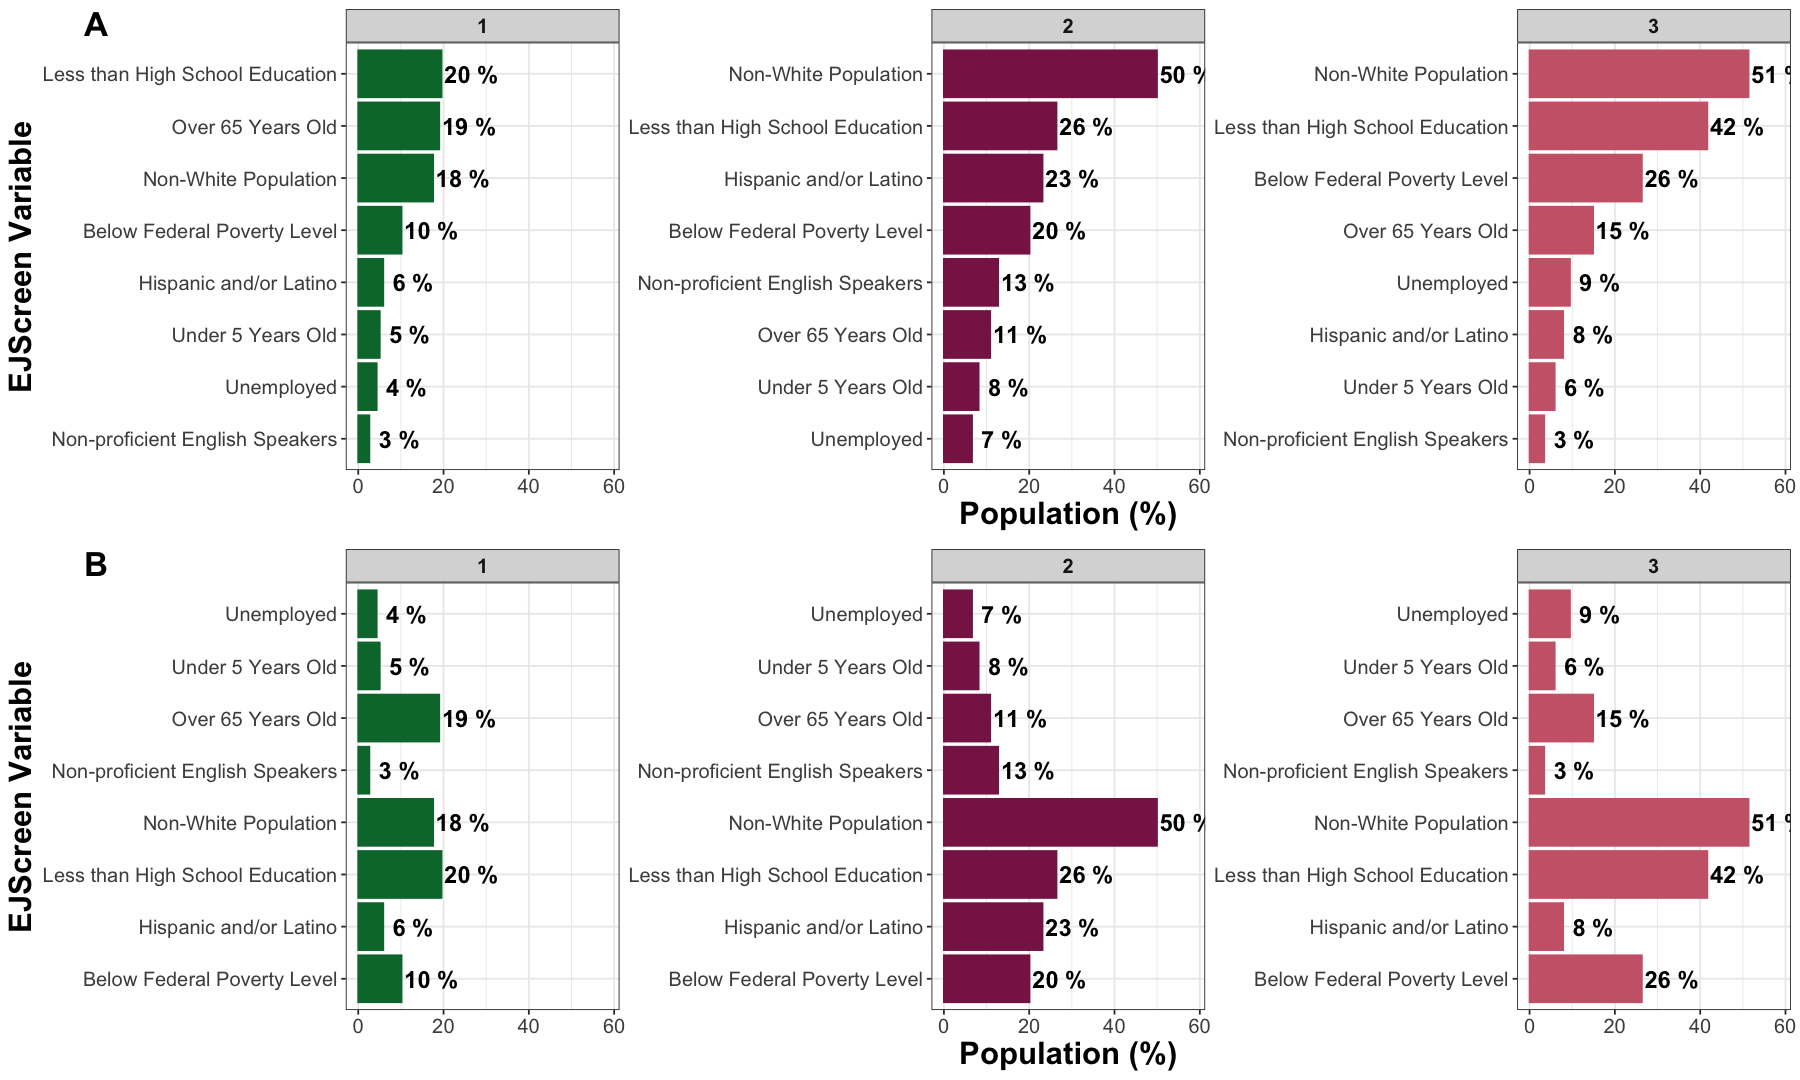

In [6]:
options(repr.plot.width = 15, repr.plot.height = 9) #changing size
FigureS1 = plot_grid(FigureS1a, FigureS1b, ncol = 1,
                            # adding labels, changing size their size and position
                            labels = "AUTO", label_size = 20, label_x = 0.04)
FigureS1

# Housing Cluster Variables

In [7]:
# first assigning geo ids to ejscreen clusters based on housing data
# starting by making the housing df into a wide format
# selecting variables we're interested in
housing_indicators = c("Housing_Density", "Median_House_Value")

longer_housing_df = housing_df %>%
                                 pivot_longer(cols = c(4:12), names_to = "Variables", values_to = "Value") %>%
    filter(Variables %in% housing_indicators)
head(longer_housing_df)

GEO_ID,Census_Tract,County,Variables,Value
<chr>,<dbl>,<chr>,<chr>,<dbl>
14000US37001020100,201,Alamance,Housing_Density,31.54848
14000US37001020100,201,Alamance,Median_House_Value,149600.00000
14000US37001020200,202,Alamance,Housing_Density,26.03618
14000US37001020200,202,Alamance,Median_House_Value,83400.00000
14000US37001020300,203,Alamance,Housing_Density,71.60011
14000US37001020300,203,Alamance,Median_House_Value,91500.00000


In [8]:
# starting by creating 1 df
housing_ejscreen_clusters_df = inner_join(ejscreen_cluster_df[,c(1,7)], longer_housing_df) %>%
    # scaling within each variable first
    group_by(Variables) %>%
    mutate(Scaled_Value = scale(Value)) %>%
    ungroup() %>%
    # averaging values for each variable within each cluster
    group_by(Cluster, Variables) %>%
    summarize(Avg_Scaled_Value = mean(Scaled_Value), Avg_Value = mean(Value)) %>%
    # lastly arranging variables from highest to lowest within each cluster
    arrange(-Avg_Scaled_Value, .by_group = TRUE) %>%
    ungroup() %>%
    # cleaning variable names here
    mutate(Variables = ifelse(Variables == "Housing_Density", "Housing Density",
                                  ifelse(Variables == "Median_House_Value", "Median House Value", NA)))  

# need to change cluster col into a character for ggplot
housing_ejscreen_clusters_df$Cluster = as.character(housing_ejscreen_clusters_df$Cluster)
           
head(housing_ejscreen_clusters_df)

Joining with `by = join_by(GEO_ID)`
Warning message in inner_join(ejscreen_cluster_df[, c(1, 7)], longer_housing_df):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”
`summarise()` has grouped output by 'Cluster'. You can override using the
`.groups` argument.


Cluster,Variables,Avg_Scaled_Value,Avg_Value
<chr>,<chr>,<dbl>,<dbl>
1,Median House Value,0.27098655,196823.1078
1,Housing Density,0.02640746,674.9886
2,Housing Density,-0.14465816,494.6583
2,Median House Value,-0.34913804,132127.0296
3,Housing Density,0.02896017,677.6795
3,Median House Value,-0.40927717,125852.8613


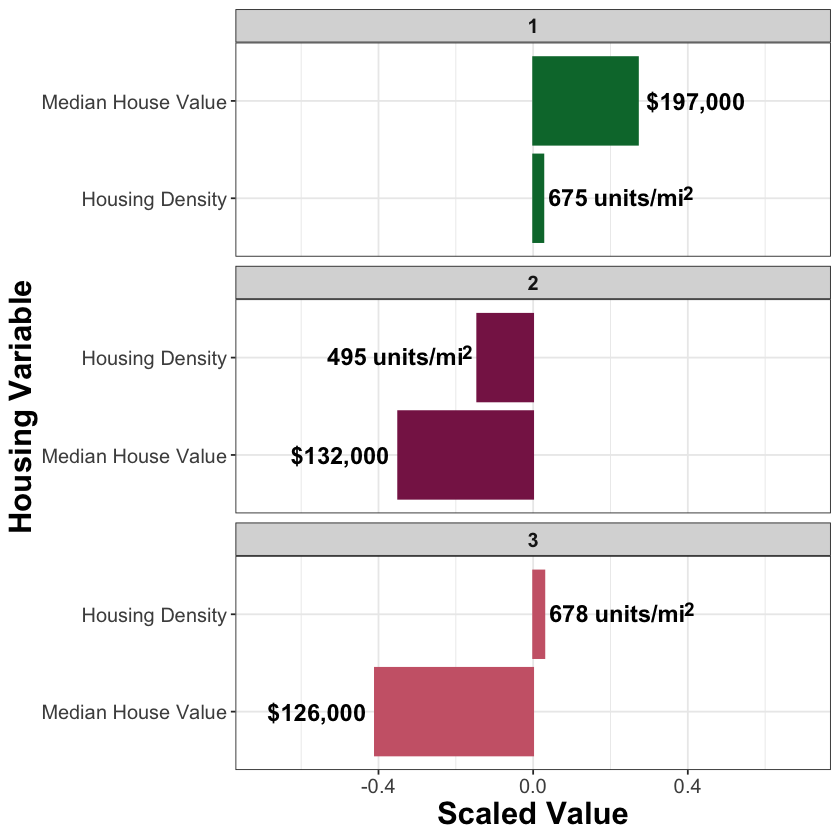

In [9]:
options(repr.plot.width = 7, repr.plot.height = 7) #changing size

# getting color palette
peru_palette = MetPalettes$Kandinsky[[1]]

Figure4a = ggplot(data = housing_ejscreen_clusters_df) + 
  geom_col(aes(x = Avg_Scaled_Value, y = reorder_within(Variables, Avg_Scaled_Value, Cluster), color = Cluster, 
               fill = Cluster)) + 
  # adding in original values for clarity
  geom_text(data = housing_ejscreen_clusters_df %>%
                filter(Variables == "Median House Value", Avg_Scaled_Value > 0), 
            aes(x = Avg_Scaled_Value + 0.15, label = dollar(round(Avg_Value, digits = -3)), 
                y = reorder_within(Variables, Avg_Scaled_Value, Cluster)), fontface = "bold", size = 5) +
  geom_text(data = housing_ejscreen_clusters_df %>%
                filter(Variables == "Median House Value", Avg_Scaled_Value < 0), 
            aes(x = Avg_Scaled_Value - 0.15, label = dollar(round(Avg_Value, digits = -3)), 
                y = reorder_within(Variables, Avg_Scaled_Value, Cluster)), fontface = "bold", size = 5) +
  geom_richtext(data = housing_ejscreen_clusters_df %>%
                 filter(Variables == "Housing Density", Avg_Scaled_Value > 0), size = 5, fontface = "bold",
                aes(x = Avg_Scaled_Value + 0.2,  y = reorder_within(Variables, Avg_Scaled_Value, Cluster), 
                                                label = paste0(round(Avg_Value), " units/mi<sup>2</sup>")),
                fill = NA, label.color = NA) + # remove background and outline
  geom_richtext(data = housing_ejscreen_clusters_df %>%
                 filter(Variables == "Housing Density", Avg_Scaled_Value < 0), size = 5, fontface = "bold",
                aes(x = Avg_Scaled_Value - 0.2,  y = reorder_within(Variables, Avg_Scaled_Value, Cluster), 
                                                label = paste0(round(Avg_Value), " units/mi<sup>2</sup>")),
                fill = NA, label.color = NA) + # remove background and outline

  scale_y_reordered() + # for some reason this cleans up the variables names

  facet_wrap(~Cluster, scales = 'free_y', ncol = 1) + 
  theme_bw() + #changing theme
  theme(axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        strip.text = element_text(size = 12, face = "bold"), #changing facet wrap text
        legend.position = "none") + #removing legend
  xlim(-0.7,0.7) +

  scale_color_manual(values = c("#027639", prism_colors[c(9,2)])) +
  scale_fill_manual(values = c("#027639", prism_colors[c(9,2)])) +

  labs(y = 'Housing Variable', x = "Scaled Value")

Figure4a

In [22]:
# creating a whp and ej screen df for plotting
avg_whp_ejscreen_clusters_df = unique(inner_join(whp_df, ejscreen_cluster_df[,c(1,7)])) %>%
    group_by(Cluster) %>%
    summarize(WHP = mean(Wildfire_Hazard_Potential_Mean), SD = sd(Wildfire_Hazard_Potential_Mean))

avg_whp_ejscreen_clusters_df$Cluster = factor(avg_whp_ejscreen_clusters_df$Cluster, levels = c(3,2,1))
avg_whp_ejscreen_clusters_df

Joining with `by = join_by(GEO_ID)`


Cluster,WHP,SD
<fct>,<dbl>,<dbl>
1,169.7584,118.7628
2,165.1238,103.4323
3,189.0773,146.4062


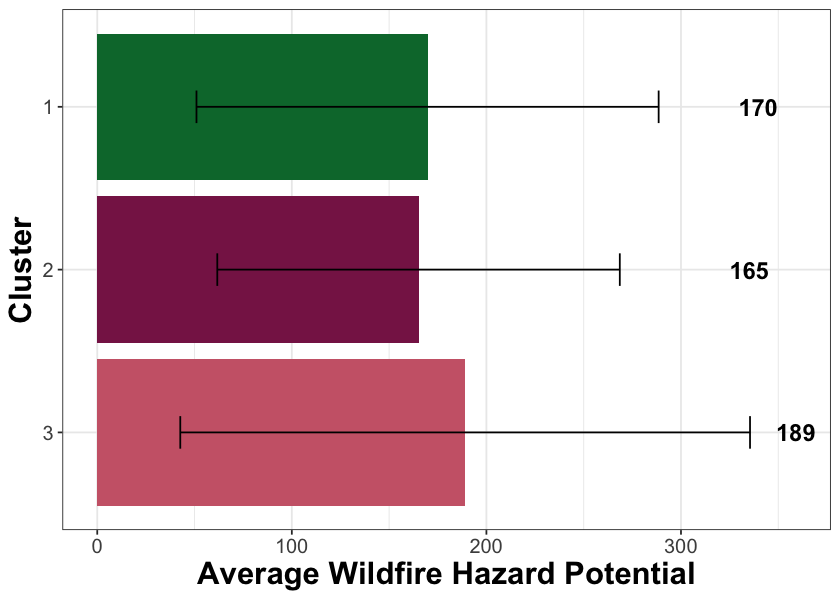

In [27]:
options(repr.plot.width = 7, repr.plot.height = 5) #changing size

# getting color palette
palette_colors = brewer.pal(7, "OrRd")

Figure4b = ggplot(avg_whp_ejscreen_clusters_df) + 
  geom_col(aes(x = WHP, y = Cluster, fill = Cluster)) +
  geom_errorbar(aes(x = WHP, y = Cluster, xmin = WHP - SD, xmax = WHP + SD), width = .2) + 

  # adding in original values for clarity
  geom_text(aes(x = WHP + 170, label = round(WHP), y = Cluster, fontface = "bold"), size = 5) +

  theme_bw() + #changing theme
  theme(axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        strip.text = element_text(size = 12, face = "bold"), #changing facet wrap text
        legend.position = "none") + #removing legend

  scale_color_manual(values = c(prism_colors[c(2,9)], "#027639")) +
  scale_fill_manual(values = c(prism_colors[c(2,9)], "#027639")) +

labs(x = 'Average Wildfire Hazard Potential', y = "Cluster")

Figure4b

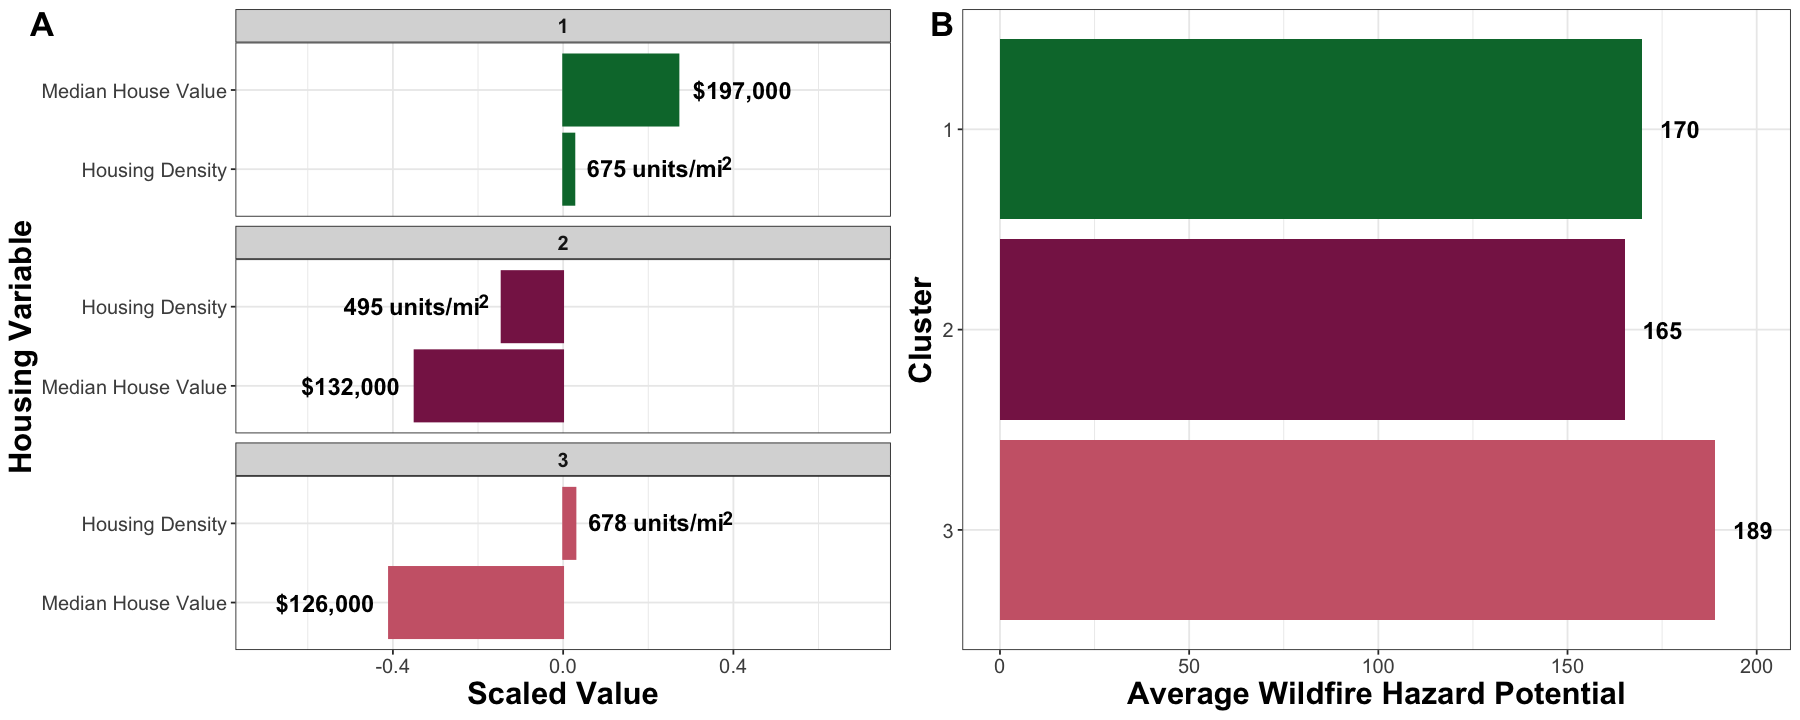

In [12]:
options(repr.plot.width = 15, repr.plot.height = 6) #changing size
Figure4 = plot_grid(Figure4a, Figure4b, 
                            # adding labels, changing size their size and position
                            labels = "AUTO", label_size = 20, label_x = 0.02)
Figure4

In [13]:
# exporting data
#write.csv(averaged_ejscreen_df, paste0(Output,"/", cur_date, "_EJScreen_Cluster_Averages.csv"), row.names = FALSE)

In [14]:
# # exporting figures
# ggsave(FigureS1, 
#        filename = 'Figure S1.pdf',
#        path = Output,
#        # need to respecify dimensions here when exporting figures
#        width = 15, height = 9)

# # exporting figures
# ggsave(Figure5, 
#        filename = 'Figure 5.pdf',
#        path = Output,
#        # need to respecify dimensions here when exporting figures
#        width = 15, height = 6)

# ANOVA

Testing for significant differences of housing indicies and WHP between clusters.

In [15]:
whp_cluster_df = unique(inner_join(whp_df, ejscreen_cluster_df[,c(1,7)])) %>%
    # scaling 
    mutate(WHP = scale(Wildfire_Hazard_Potential_Mean))

ses_cluster_df = unique(inner_join(ejscreen_cluster_df[,c(1,7)], longer_housing_df)) %>%
    # scaling 
    group_by(Variables) %>%
    mutate(Scaled_Value = scale(Value)) %>%
    dplyr::select(-Value) %>%
    pivot_wider(names_from = Variables, values_from = Scaled_Value)#%>%

# changing cluster col into a factor
whp_cluster_df$Cluster = factor(whp_cluster_df$Cluster)
ses_cluster_df$Cluster = factor(ses_cluster_df$Cluster)

head(whp_cluster_df)
head(ses_cluster_df)

Joining with `by = join_by(GEO_ID)`
Joining with `by = join_by(GEO_ID)`
Warning message in inner_join(ejscreen_cluster_df[, c(1, 7)], longer_housing_df):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


,GEO_ID,FIPS,County,Census_Tract,Avg_ACRES,Wildfire_Hazard_Potential_Mean,Wildfire_Hazard_Potential_Quintile_Number,Wildfire_Hazard_Potential_Quintile_Percentage,Cluster,WHP
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,"<dbl[,1]>"
1,14000US37141920201,37141920201,Pender,9202.01,596842.6,715.5177,5,0-20%,1,4.352076
9,14000US37141920401,37141920401,Pender,9204.01,596842.6,715.5177,5,0-20%,3,4.352076
17,14000US37141920402,37141920402,Pender,9204.02,596842.6,715.5177,5,0-20%,1,4.352076
25,14000US37141920403,37141920403,Pender,9204.03,596842.6,715.5177,5,0-20%,1,4.352076
33,14000US37141920601,37141920601,Pender,9206.01,596842.6,715.5177,5,0-20%,2,4.352076
41,14000US37153970400,37153970400,Richmond,9704.00,307147.7,704.1077,5,0-20%,1,4.260391


GEO_ID,Cluster,Census_Tract,County,Housing_Density,Median_House_Value
<chr>,<fct>,<dbl>,<chr>,"<dbl[,1]>","<dbl[,1]>"
14000US37001020100,3,201.00,Alamance,-0.5838567,-0.1816193
14000US37001020200,2,202.00,Alamance,-0.5890847,-0.8160305
14000US37001020300,2,203.00,Alamance,-0.5458704,-0.7384062
14000US37001020400,2,204.00,Alamance,-0.5630592,-0.6866566
14000US37001020501,1,205.01,Alamance,-0.4980356,-0.2985350
14000US37001020502,2,205.02,Alamance,-0.1667388,-0.9109047


In [16]:
# contrasts show what clusters are being compared in anova
# these comparisons aren't what we want so I changed them below
contrasts(whp_cluster_df$Cluster)   

,2,3
1,0,0
2,1,0
3,0,1


In [17]:
contrasts(whp_cluster_df$Cluster) = cbind(c(-1,1,0),c(-1,0,1))
contrasts(ses_cluster_df$Cluster) = cbind(c(-1,1,0),c(-1,0,1))
contrasts(whp_cluster_df$Cluster) 

1,-1,-1
2,1,0
3,0,1


In [18]:
# running anova
whp_anova = aov(WHP ~ Cluster, data = whp_cluster_df)
density_anova = aov(Housing_Density ~ Cluster, data = ses_cluster_df)
house_value_anova = aov(Median_House_Value ~ Cluster, data = ses_cluster_df)

summary(whp_anova)
summary(density_anova)
summary(house_value_anova)

              Df Sum Sq Mean Sq F value  Pr(>F)   
Cluster        2   11.3   5.632   5.656 0.00355 **
Residuals   2166 2156.7   0.996                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

              Df Sum Sq Mean Sq F value Pr(>F)  
Cluster        2    8.5   4.238   4.251 0.0144 *
Residuals   2153 2146.5   0.997                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

              Df Sum Sq Mean Sq F value Pr(>F)    
Cluster        2  226.3   113.2   126.3 <2e-16 ***
Residuals   2153 1928.7     0.9                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [19]:
# creating tukey function
get_tukeys = function(anova){
    # tukey's post hoc
    tukeys_summary = summary(glht(anova, linfct = mcp(Cluster = "Tukey")), test = adjusted("none"))
    tukeys_test = tukeys_summary$test

    # creating final df
    tukey_df = data.frame(cbind(Variable = colnames(anova$model)[1], Statistic = tukeys_test$tstat, 
                                `P Value` = tukeys_test$pvalues)) %>%
        rownames_to_column(var = "Comparison")
    tukey_df$`P Adj` = p.adjust(tukey_df$P.Value, method = "fdr")
    
    return(tukey_df)
}

# calling fn
whp_tukeys = get_tukeys(whp_anova)
density_tukeys = get_tukeys(density_anova)
house_value_tukeys = get_tukeys(house_value_anova)

In [20]:
# creating 1 df
tukeys_results = rbind(whp_tukeys, density_tukeys, house_value_tukeys)
tukeys_results

Comparison,Variable,Statistic,P.Value,P Adj
<chr>,<chr>,<chr>,<chr>,<dbl>
2 - 1,WHP,-0.612423347486618,0.540321984672501,0.540321985
3 - 1,WHP,3.0474236185084,0.0023359991511831,0.007007997
3 - 2,WHP,2.79659713283072,0.0052099901282161,0.007814985
2 - 1,Housing_Density,-2.80770295499888,0.00503458828442005,0.015103765
3 - 1,Housing_Density,0.0499928304353573,0.960132738906055,0.960132739
3 - 2,Housing_Density,2.52045014673995,0.0117922320462192,0.017688348
2 - 1,Median_House_Value,-10.7375219801588,0,0.000000000
3 - 1,Median_House_Value,-14.0546560638278,0,0.000000000
3 - 2,Median_House_Value,-0.921035553329517,0.357135053771462,0.357135054


In [21]:
# exporting
write.xlsx(tukeys_results, paste0(Output,"/", "WHP_SES_Tukeys_Results_", cur_date, ".xlsx"), rowNames = FALSE)